In [7]:
# Import necessary libraries
import numpy as np                     # For numerical operations
import pandas as pd                    # For data manipulation and analysis
import tensorflow as tf                # For building and training neural networks
import matplotlib.pyplot as plt        # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and validation sets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating model performance
from tensorflow.keras.models import Sequential  # For creating sequential models
from tensorflow.keras.layers import Dense       # For adding dense layers to the model
from tensorflow.keras.callbacks import EarlyStopping # For implementing early stopping during training to prevent overfitting

In [2]:
# Load the dataset from a CSV file
data = pd.read_csv(r'C:\Users\Rabab\Downloads\orbit.csv')  # Adjust the file path as necessary
print(data.isnull().sum())            # Check for missing values in the dataset

time_steps    0
y             0
dtype: int64


In [3]:
# Prepare the feature (time_steps) and target (y_positions) variables
time_steps = data['time_steps'].to_numpy().reshape(-1, 1)  # Convert 'time_steps' column to a 2D numpy array
y_positions = data['y'].to_numpy().reshape(-1, 1)          # Convert 'y' column to a 2D numpy array


In [5]:
# Check for missing values in the processed data
# Should return 0 if there are no missing values
missing_time_steps = np.isnan(time_steps).sum()
missing_y_positions = np.isnan(y_positions).sum()

print(f"Missing values in time_steps: {missing_time_steps}")
print(f"Missing values in y_positions: {missing_y_positions}")

Missing values in time_steps: 0
Missing values in y_positions: 0


In [6]:
# Display the first few rows of the dataset
data.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [8]:
# Initialize the neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(1024, input_dim=1, activation='relu'))  # Input layer with 1024 neurons
model.add(Dense(1024, activation='relu'))                # Hidden layer with 1024 neurons
model.add(Dense(1024, activation='relu'))                # Hidden layer with 1024 neurons
model.add(Dense(1024, activation='relu'))                # Hidden layer with 1024 neurons
model.add(Dense(1024, activation='relu'))                # Hidden layer with 1024 neurons
model.add(Dense(1024, activation='relu'))                # Hidden layer with 1024 neurons
model.add(Dense(1))                                     # Output layer with 1 neuron for regression

# Display the model's summary, including layers and parameter counts
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              2048      
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [14]:


# Compile the model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model on the dataset with early stopping
model.fit(time_steps, y_positions, epochs=100, callbacks=[early_stopping])  # Fit the model to the data for 100 epochs

print('Training started..., this can take a while:')


Epoch 1/100
63/63 [==============================] - 5s 55ms/step - loss: 17.7847
Epoch 2/100
63/63 [==============================] - 3s 54ms/step - loss: 0.8658
Epoch 3/100
63/63 [==============================] - 3s 55ms/step - loss: 0.1301
Epoch 4/100
63/63 [==============================] - 4s 57ms/step - loss: 0.0844
Epoch 5/100
63/63 [==============================] - 4s 60ms/step - loss: 0.0478
Epoch 6/100
63/63 [==============================] - 4s 58ms/step - loss: 0.0408
Epoch 7/100
63/63 [==============================] - 4s 61ms/step - loss: 0.0343
Epoch 8/100
63/63 [==============================] - 4s 60ms/step - loss: 0.0263
Epoch 9/100
63/63 [==============================] - 4s 67ms/step - loss: 0.1092
Epoch 10/100
63/63 [==============================] - 4s 68ms/step - loss: 0.0719
Epoch 11/100
63/63 [==============================] - 4s 59ms/step - loss: 0.0447
Epoch 12/100
63/63 [==============================] - 4s 58ms/step - loss: 0.0407
Epoch 13/100
63/63 [====

In [15]:
# Define feature and target variables for splitting
X = time_steps
y = y_positions

# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


7/7 [==============================] - 0s 8ms/step


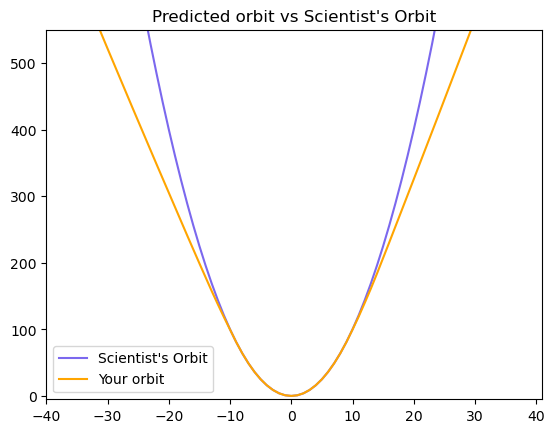

In [16]:
# Define a function to plot the predicted orbital path
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)  # Calculate axis limit based on predictions
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2, color="mediumslateblue")  # Plot scientist's orbit
    plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange")  # Plot predicted orbit
    plt.axis([-40, 41, -5, 550])  # Set the axis limits
    plt.legend(["Scientist's Orbit", 'Your orbit'], loc="lower left")  # Add legend
    plt.title("Predicted orbit vs Scientist's Orbit")  # Title of the plot

# Predict the orbital path for a range of time values (from -100 to 100)
eighty_min_orbit = model.predict(np.arange(-100, 101))

# Plot the predicted orbital path
plot_orbit(eighty_min_orbit)

In [17]:
# Make predictions using the validation set
y_pred = model.predict(X_val)

# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_val, y_pred)  # Mean Absolute Error
r2 = r2_score(y_val, y_pred)              # R-squared score

# Print the calculated metrics
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')  # Display the evaluation result

13/13 [==============================] - 1s 8ms/step
MSE: 0.004303338122074861, MAE: 0.045967922403006206, R2: 0.9999947974846712


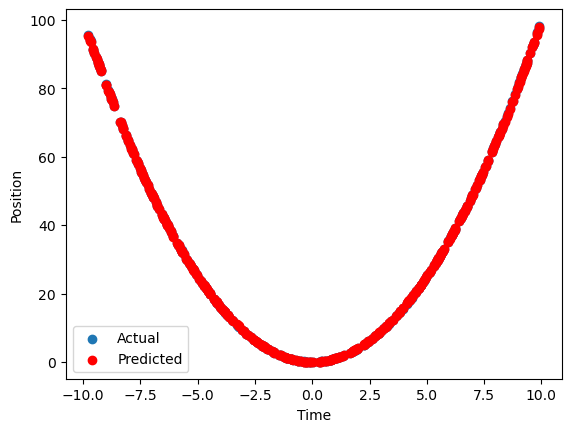

In [18]:
# Visualize actual vs predicted positions
plt.scatter(X_val, y_val, label='Actual')  # Scatter plot of actual values
plt.scatter(X_val, y_pred, label='Predicted', color='r')  # Scatter plot of predicted values
plt.xlabel('Time')  # Label for x-axis
plt.ylabel('Position')  # Label for y-axis
plt.legend()  # Show legend
plt.savefig('position_vs_predicted.png')  # Save the plot as a PNG file
plt.show()  # Display the plot